## ACO


In [1]:
import random as rn
import numpy as np
from numpy.random import choice as np_choice

class AntColony(object):

    def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        """
        Args:
            distances (2D numpy.array): Square matrix of distances. Diagonal is assumed to be np.inf.
            n_ants (int): Number of ants running per iteration
            n_best (int): Number of best ants who deposit pheromone
            n_iteration (int): Number of iterations
            decay (float): Rate it which pheromone decays. The pheromone value is multiplied by decay, so 0.95 will lead to decay, 0.5 to much faster decay.
            alpha (int or float): exponenet on pheromone, higher alpha gives pheromone more weight. Default=1
            beta (int or float): exponent on distance, higher beta give distance more weight. Default=1

        Example:
            ant_colony = AntColony(german_distances, 100, 20, 2000, 0.95, alpha=1, beta=2)          
        """
        self.distances  = distances
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    def run(self):
        shortest_path = None
        all_time_shortest_path = ("placeholder", np.inf)
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheronome(all_paths, self.n_best, shortest_path=shortest_path)
            shortest_path = min(all_paths, key=lambda x: x[1])
            print (shortest_path)
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path            
            self.pheromone = self.pheromone * self.decay            
        return all_time_shortest_path

    def spread_pheronome(self, all_paths, n_best, shortest_path):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for move in path:
                self.pheromone[move] += 1.0 / self.distances[move]

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in path:
            total_dist += self.distances[ele]
        return total_dist

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        for i in range(len(self.distances) - 1):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append((prev, move))
            prev = move
            visited.add(move)
        path.append((prev, start)) # going back to where we started    
        return path

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0

        row = pheromone ** self.alpha * (( 1.0 / dist) ** self.beta)

        norm_row = row / row.sum()
        move = np_choice(self.all_inds, 1, p=norm_row)[0]
        return move

##extra
def show_pheromone(self):
    return self.pheromone



### Example 

In [ ]:
import numpy as np
#! pip install ant_colony

#from ant_colony import AntColony

distances = np.array([[np.inf, 2, 2, 5, 7],
                      [2, np.inf, 4, 8, 2],
                      [2, 4, np.inf, 1, 3],
                      [5, 8, 1, np.inf, 2],
                      [7, 2, 3, 2, np.inf]])
print(type(distances))
print(distances)

##extra 
alphas = np.linspace(0.01,1,100)
shortest_sols = []
for alpha in alphas:
  ant_colony = AntColony(distances, 1, 1, 10, 0.2, alpha, beta=1)
  shortest_path = ant_colony.run()
  shortest_sols.append(shortest_path[1])
#print ("shorted_path: {}".format(shortest_path))


<class 'numpy.ndarray'>
[[inf  2.  2.  5.  7.]
 [ 2. inf  4.  8.  2.]
 [ 2.  4. inf  1.  3.]
 [ 5.  8.  1. inf  2.]
 [ 7.  2.  3.  2. inf]]
([(0, 3), (3, 4), (4, 2), (2, 1), (1, 0)], 16.0)
([(0, 2), (2, 3), (3, 1), (1, 4), (4, 0)], 20.0)
([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 9.0)
([(0, 2), (2, 4), (4, 3), (3, 1), (1, 0)], 17.0)
([(0, 2), (2, 4), (4, 1), (1, 3), (3, 0)], 20.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 9.0)
([(0, 2), (2, 4), (4, 1), (1, 3), (3, 0)], 20.0)
([(0, 2), (2, 4), (4, 1), (1, 3), (3, 0)], 20.0)
([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 9.0)
([(0, 1), (1, 3), (3, 2), (2, 4), (4, 0)], 21.0)
([(0, 4), (4, 1), (1, 2), (2, 3), (3, 0)], 19.0)
([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 9.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 9.0)
([(0, 3), (3, 2), (2, 4), (4, 1), (1, 0)], 13.0)
([(0, 1), (1, 2), (2, 3), (3, 4), (4, 0)], 16.0)
([(0, 3), (3, 2), (2, 1), (1, 4), (4, 0)], 19.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 9.0)
([(0, 1), (1, 4), (4, 3), (3, 2),

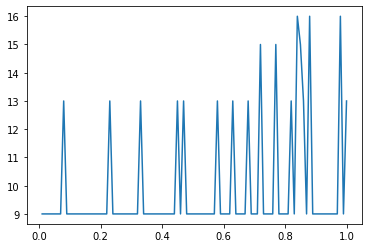

In [ ]:
import matplotlib.pyplot as plt
plt.plot(alphas,shortest_sols)

## 1. use small data set, txt file, distances


In [3]:
import numpy as np
data = np.loadtxt('att48_d.txt')
print(data)
data.shape

[[   0. 4727. 1205. ... 1542. 2379. 3744.]
 [4727.    0. 3588. ... 5461. 4390. 2088.]
 [1205. 3588.    0. ... 2023. 1867. 2560.]
 ...
 [1542. 5461. 2023. ...    0. 1644. 3928.]
 [2379. 4390. 1867. ... 1644.    0. 2532.]
 [3744. 2088. 2560. ... 3928. 2532.    0.]]


(48, 48)

In [4]:
#convert the number in the diagnoal to infinite.
np.fill_diagonal(data, np.inf, wrap=False)
print(type(data))
print(data)


<class 'numpy.ndarray'>
[[  inf 4727. 1205. ... 1542. 2379. 3744.]
 [4727.   inf 3588. ... 5461. 4390. 2088.]
 [1205. 3588.   inf ... 2023. 1867. 2560.]
 ...
 [1542. 5461. 2023. ...   inf 1644. 3928.]
 [2379. 4390. 1867. ... 1644.   inf 2532.]
 [3744. 2088. 2560. ... 3928. 2532.   inf]]


In [5]:
distances = data
#print(type(distances))
#print(distances)


##extra 
alphas = np.linspace(0.01,1,100)
shortest_sols = []
for alpha in alphas:
  ant_colony = AntColony(distances, 1, 1, 100, 0.2, alpha, beta=1)
  shortest_path = ant_colony.run()
  shortest_sols.append(shortest_path[1])
#print ("shorted_path: {}".format(shortest_path))

#ant_colony = AntColony(distances, 15, 2, 200, 0.95, alpha=5, beta=3)
#shortest_path = ant_colony.run()
#print ("shorted_path: {}".format(shortest_path))


Streaming output truncated to the last 5000 lines.
([(0, 12), (12, 25), (25, 3), (3, 15), (15, 2), (2, 33), (33, 42), (42, 13), (13, 19), (19, 18), (18, 7), (7, 8), (8, 37), (37, 36), (36, 29), (29, 10), (10, 22), (22, 9), (9, 23), (23, 46), (46, 39), (39, 27), (27, 35), (35, 21), (21, 1), (1, 5), (5, 26), (26, 17), (17, 16), (16, 43), (43, 30), (30, 14), (14, 11), (11, 32), (32, 45), (45, 6), (6, 38), (38, 40), (40, 47), (47, 4), (4, 41), (41, 34), (34, 31), (31, 28), (28, 20), (20, 24), (24, 44), (44, 0)], 108451.0)
([(0, 47), (47, 20), (20, 46), (46, 12), (12, 10), (10, 39), (39, 43), (43, 17), (17, 35), (35, 27), (27, 36), (36, 16), (16, 42), (42, 19), (19, 18), (18, 5), (5, 31), (31, 14), (14, 11), (11, 9), (9, 34), (34, 3), (3, 28), (28, 33), (33, 26), (26, 8), (8, 37), (37, 4), (4, 24), (24, 38), (38, 30), (30, 6), (6, 29), (29, 40), (40, 21), (21, 7), (7, 15), (15, 2), (2, 13), (13, 22), (22, 45), (45, 32), (32, 23), (23, 41), (41, 25), (25, 44), (44, 1), (1, 0)], 89579.0)
([(0

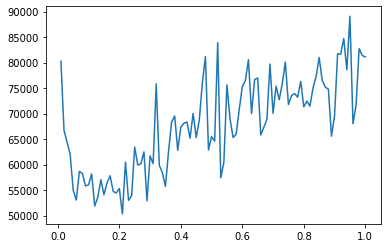

In [ ]:
import matplotlib.pyplot as plt
plt.plot(alphas,shortest_sols)

`def __init__(self, distances_matrix, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):`
      
* n_ants (int): Number of ants running per iteration
* n_best (int): Number of best ants who deposit pheromone
* n_iteration (int): Number of iterations
* decay (float): Rate it which pheromone decays. The pheromone value is multiplied by decay, so 0.95 will lead to decay, 0.5 to much faster decay.
alpha (int or float): exponenet on pheromone, higher alpha gives pheromone more weight. Default=1
* beta (int or float): exponent on distance, higher beta give distance more weight. Default=1
----------------------------------------------------------

dataset's url: https://people.sc.fsu.edu/~jburkardt/datasets/tsp/tsp.html

ATT48 is a set of 48 cities (US state capitals) from TSPLIB. The minimal tour has length **33523**
-------------------------------------------------------------

1.  `ant_colony = AntColony(distances, 1, 1, 100, 0.95, alpha=1, beta=1)`

The result via this algorithm is 52459.0

2. `ant_colony = AntColony(distances, 3, 1, 150, 0.95, alpha=1, beta=1)`

result: 38037.0

3. `ant_colony = AntColony(distances, 1, 1, 200, 0.95, alpha=1, beta=1)` 

result: 38650.0

4. `ant_colony = AntColony(distances, 3, 1, 200, 0.95, alpha=1, beta=1)`

result: 38631.0

5. `ant_colony = AntColony(distances, 2, 1, 100, 0.95, alpha=1, beta=1)`

result: 46134.0
6. `ant_colony = AntColony(distances, 1, 2, 100, 0.95, alpha=1, beta=1)`

result: 57533.0

7. `ant_colony = AntColony(distances, 15, 3, 200, 0.95, alpha=2, beta=3)` 35523.0



## time: 100 iteration: 
distances, 10, 4, 100, 0.2, alpha=1, beta=5

In [ ]:
import time
time_taken = []
distances = data
for i in range(100):
    aco = ant_colony = AntColony(distances, 10, 4, 100, 0.2, alpha=1, beta=5)
    shortest_path = ant_colony.run()
    print ("shorted_path: {}".format(shortest_path))
    start_time = time.clock()
    #score = aco.fit(distances, 18, 4, 200, 0.95, alpha=1, beta=4)
    #score = aco.fit(data,iterations=200,mode='min',early_stopping_count=10,verbose=False)
    total_time = time.clock() - start_time
    time_taken.append(total_time)
   # optimal_value.append(score)
    print(f'Loop {i+1} complete')


# print("--- %s seconds ---" % (time.time() - start_time))

print(f"Mean time taken: {np.mean(time_taken)}")
print(f"Deviation in time taken: {np.std(time_taken)}")

## benchmarking: timing
AntColony(distances, 100, 10, 100, 0.2, alpha=1, beta=5)

In [ ]:
import time
time_taken = []
sols = []
distances = data
for i in range(100):
    aco = ant_colony = AntColony(distances, 100, 10, 100, 0.2, alpha=1, beta=5)
    start_time = time.clock()
    shortest_path = ant_colony.run()
    total_time = time.clock() - start_time
    print ("shorted_path: {}".format(shortest_path))
    sols.append(shortest_path[1])
    time_taken.append(total_time)
    print(f'Loop {i+1} complete')



# print("--- %s seconds ---" % (time.time() - start_time))

print(f"Mean time taken: {np.mean(time_taken)}")
print(f"Deviation in time taken: {np.std(time_taken)}")
print(f"Average Solution: {np.mean(sols)}")
print(f"Best Solution: {np.min(sols)}")